# Continuous

In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
from aspera import utils

# --------------------------------------------------------
# Project-specific
# --------------------------------------------------------
current_directory = '/Users/davidelegacci/RESEARCH/phd/phd-research/phd-collab-papers/4-IncompressibleGames/MOR/Figures'
NAME = 'incompressible'
# --------------------------------------------------------

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import itertools
from aspera import utils
from gamelab import finitegames
from scipy.spatial import distance

# to write general code for arbitrary regularizer and game; now quick and dirty

In [4]:
import legendre
#import gamelab.finitegames as NormalFormGame
import sympy as sp

In [5]:
skeleton = [3,3,3]
effs = [ Ai-1 for Ai in skeleton ]
dim = sum([eff for eff in effs])


In [6]:
effs

[2, 2, 2]

In [7]:
dim

6

In [8]:
triples = list(itertools.combinations(range(dim), 3))  # Generate all triples of dimensions to plot
for triple in triples:
    print(triple)

(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(0, 1, 5)
(0, 2, 3)
(0, 2, 4)
(0, 2, 5)
(0, 3, 4)
(0, 3, 5)
(0, 4, 5)
(1, 2, 3)
(1, 2, 4)
(1, 2, 5)
(1, 3, 4)
(1, 3, 5)
(1, 4, 5)
(2, 3, 4)
(2, 3, 5)
(2, 4, 5)
(3, 4, 5)


In [9]:
x = sp.symbols('x', positive=True)

In [10]:
u_flat = [22/3, 0, -32/3, 1/3, -11, 22/3, -15, 11/3, -10, 29/3, 3, -22/3, -4/3, -8, -7/3, -9, -20/3, -6, 3, -5, -5, -5, -3, -3, -3, -4, -3, -16/3, 44/3, -7/3, -8/3, 28/3, -20/3, 2, 3, 4, -1, -2, 0, 1, 4, 2, 2, 2, 4, 4, 1, -3, 4, -5, 0, -5, -4, -2, 3, -6, 4, -5, 0, -5, 1, -1, -3, -4, -3, -1, 0, -1, 4, -3, 2, -4, -1, -1, -3, -1, -3, 1, 1, 4, -2]
#u_flat = [-1, -11, 15, -3, -1, -1, 4, -2, 7, -2, -3, -2, -1, -1, 4, 4, -10, 0, 2, 3, 4, -1, 1, -5]
u = finitegames.Utils.u_flat_to_tensor(u_flat, skeleton)

In [11]:
G = finitegames.NFG( skeleton, 'numeric', 'x', 'y', 'incompressible', u  )

In [12]:
len(G.eff_payfield)

3

In [13]:
for v in G.eff_payfield:
    print(len(v))

2
2
2


In [14]:
payfields =  [ sp.Matrix(v) for v in G.eff_payfield  ]

In [15]:
payfields[0]

Matrix([
[4.0*x1_1*x2_1 - 9.0*x1_1*x2_2 - 4.0*x1_1 - 17.0*x1_2*x2_1 - 3.0*x1_2*x2_2 + 3.66666666666667*x1_2 + 0.666666666666667*x2_1 + 0.999999999999999*x2_2 + 2.33333333333333],
[          14.0*x1_1*x2_1 - 15.0*x1_1*x2_2 - 1.0*x1_1 - 19.0*x1_2*x2_1 - 15.0*x1_2*x2_2 + 16.3333333333333*x1_2 - 0.666666666666667*x2_1 + 10.0*x2_2 - 4.33333333333333]])

In [16]:
payfields[1]

Matrix([
[ 12.0*x0_1*x2_1 + 7.0*x0_1*x2_2 - 0.666666666666667*x0_1 + 2.0*x0_2*x2_1 + 10.0*x0_2*x2_2 - 2.66666666666667*x0_2 - 8.0*x2_1 - 7.0*x2_2 + 2.66666666666667],
[20.0*x0_1*x2_1 + 2.0*x0_1*x2_2 - 4.33333333333333*x0_1 + 23.0*x0_2*x2_1 + 11.0*x0_2*x2_2 - 16.3333333333333*x0_2 - 19.0*x2_1 - 1.0*x2_2 + 7.33333333333333]])

In [17]:
payfields[2]

Matrix([
[-16*x0_1*x1_1 - 3*x0_1*x1_2 + 10*x0_1 - 16*x0_2*x1_1 - 4*x0_2*x1_2 + 9*x0_2 + 14*x1_1 + 7*x1_2 - 9],
[         2*x0_1*x1_1 + x0_1*x1_2 + 2*x0_1 + 5*x0_2*x1_1 + 4*x0_2*x1_2 - 3*x0_2 - x1_1 - 5*x1_2 + 1]])

## Kernels

In [18]:
#---------------------------------------------------------------------
# Define (symbolic) kernel functions andtheir labels
#---------------------------------------------------------------------

# 0 = sha
# 1 = log barrier
# 2 = q-replicator
# 3 = q-replicator

# q-replicator parameters
Q = [] # [0.5, 1.5] #, 2.5]



# Kiwiel kernel parameter; very similar to q-replicator
kiw = 0.5

# Teboulle kernel --> very similar to q-replicator

# sympy expressions
simkernels = [
    x * sp.log(x),
    (x**2 - x)/4,
    - (x**kiw) / kiw] + [(x - x**q) / ( 1-q ) for q in Q ]

# kernel labels
kerlabels = ["Sha", "Eu", "Kiw"] + [f"q = {q} Sha" for q in Q]
#---------------------------------------------------------------------

# simkernels = simkernel + [  - sp.log(x) ]
# reglabels = reglabels  + [ "log" ]

## Regularizers

In [19]:
#---------------------------------------------------------------------
# Define additional (symbolic) regularizer functions functions and their labels
#---------------------------------------------------------------------
#m
simregs = [] # [ x * sp.log(x) + (2/mi - x) * sp.log(2/mi - x) for mi in m] # [ 1/2 * sp.log(x-1) + - x * sp.atanh(1-2*x) ]
reglabels_tmp = [] # [f"(m={mi})-entropic" for mi in m] # [ "atanh" ]

In [20]:
for i, h in enumerate(simregs):
    print(reglabels_tmp[i], ":", h)

In [21]:
reglabels = kerlabels + reglabels_tmp

In [22]:
# Init class
A = legendre.LinFTRL(simkernels = simkernels, reglabels = reglabels, radius = 1, sim_manual_regularizers = simregs)

hello world!


In [23]:
for i, h in enumerate(A.simregularizers):
    print(i+1, ":", reglabels[i], ":", h)

1 : Sha : x*log(x) + (1 - x)*log(1 - x)
2 : Eu : x**2/4 + (1 - x)**2/4 - 1/4
3 : Kiw : -2.0*x**0.5 - 2.0*(1 - x)**0.5


In [24]:
for i, sh in enumerate(A.simsharps):
    print(reglabels[i], ":", sh)

Sha : x*(1 - x)
Eu : 1
Kiw : 2.0*x**1.5*(1 - x)**1.5/(x**1.5 + (1 - x)**1.5)


In [25]:
G.eff

[[x0_1, x0_2], [x1_1, x1_2], [x2_1, x2_2]]

In [26]:
sharps = [ sp.eye( eff_dim ) for eff_dim in effs ]
sharps

[Matrix([
 [1, 0],
 [0, 1]]),
 Matrix([
 [1, 0],
 [0, 1]]),
 Matrix([
 [1, 0],
 [0, 1]])]

# Select here regularizer

In [27]:
for i in G.players:
    for e in range(effs[i]):
        sharps[i][e,e] = A.simsharps[0].subs(x, G.eff[i][e])
sharps

[Matrix([
 [x0_1*(1 - x0_1),               0],
 [              0, x0_2*(1 - x0_2)]]),
 Matrix([
 [x1_1*(1 - x1_1),               0],
 [              0, x1_2*(1 - x1_2)]]),
 Matrix([
 [x2_1*(1 - x2_1),               0],
 [              0, x2_2*(1 - x2_2)]])]

In [28]:
dynamics = [ sharps[i] * payfields[i] for i in G.players ]

In [29]:
payfields

[Matrix([
 [4.0*x1_1*x2_1 - 9.0*x1_1*x2_2 - 4.0*x1_1 - 17.0*x1_2*x2_1 - 3.0*x1_2*x2_2 + 3.66666666666667*x1_2 + 0.666666666666667*x2_1 + 0.999999999999999*x2_2 + 2.33333333333333],
 [          14.0*x1_1*x2_1 - 15.0*x1_1*x2_2 - 1.0*x1_1 - 19.0*x1_2*x2_1 - 15.0*x1_2*x2_2 + 16.3333333333333*x1_2 - 0.666666666666667*x2_1 + 10.0*x2_2 - 4.33333333333333]]),
 Matrix([
 [ 12.0*x0_1*x2_1 + 7.0*x0_1*x2_2 - 0.666666666666667*x0_1 + 2.0*x0_2*x2_1 + 10.0*x0_2*x2_2 - 2.66666666666667*x0_2 - 8.0*x2_1 - 7.0*x2_2 + 2.66666666666667],
 [20.0*x0_1*x2_1 + 2.0*x0_1*x2_2 - 4.33333333333333*x0_1 + 23.0*x0_2*x2_1 + 11.0*x0_2*x2_2 - 16.3333333333333*x0_2 - 19.0*x2_1 - 1.0*x2_2 + 7.33333333333333]]),
 Matrix([
 [-16*x0_1*x1_1 - 3*x0_1*x1_2 + 10*x0_1 - 16*x0_2*x1_1 - 4*x0_2*x1_2 + 9*x0_2 + 14*x1_1 + 7*x1_2 - 9],
 [         2*x0_1*x1_1 + x0_1*x1_2 + 2*x0_1 + 5*x0_2*x1_1 + 4*x0_2*x1_2 - 3*x0_2 - x1_1 - 5*x1_2 + 1]])]

In [30]:
dynamics

[Matrix([
 [x0_1*(1 - x0_1)*(4.0*x1_1*x2_1 - 9.0*x1_1*x2_2 - 4.0*x1_1 - 17.0*x1_2*x2_1 - 3.0*x1_2*x2_2 + 3.66666666666667*x1_2 + 0.666666666666667*x2_1 + 0.999999999999999*x2_2 + 2.33333333333333)],
 [          x0_2*(1 - x0_2)*(14.0*x1_1*x2_1 - 15.0*x1_1*x2_2 - 1.0*x1_1 - 19.0*x1_2*x2_1 - 15.0*x1_2*x2_2 + 16.3333333333333*x1_2 - 0.666666666666667*x2_1 + 10.0*x2_2 - 4.33333333333333)]]),
 Matrix([
 [ x1_1*(1 - x1_1)*(12.0*x0_1*x2_1 + 7.0*x0_1*x2_2 - 0.666666666666667*x0_1 + 2.0*x0_2*x2_1 + 10.0*x0_2*x2_2 - 2.66666666666667*x0_2 - 8.0*x2_1 - 7.0*x2_2 + 2.66666666666667)],
 [x1_2*(1 - x1_2)*(20.0*x0_1*x2_1 + 2.0*x0_1*x2_2 - 4.33333333333333*x0_1 + 23.0*x0_2*x2_1 + 11.0*x0_2*x2_2 - 16.3333333333333*x0_2 - 19.0*x2_1 - 1.0*x2_2 + 7.33333333333333)]]),
 Matrix([
 [x2_1*(1 - x2_1)*(-16*x0_1*x1_1 - 3*x0_1*x1_2 + 10*x0_1 - 16*x0_2*x1_1 - 4*x0_2*x1_2 + 9*x0_2 + 14*x1_1 + 7*x1_2 - 9)],
 [         x2_2*(1 - x2_2)*(2*x0_1*x1_1 + x0_1*x1_2 + 2*x0_1 + 5*x0_2*x1_1 + 4*x0_2*x1_2 - 3*x0_2 - x1_1 - 5*x1_2

In [31]:
DYN_SYM = finitegames.Utils.flatten(dynamics)
DYN_SYM

[x0_1*(1 - x0_1)*(4.0*x1_1*x2_1 - 9.0*x1_1*x2_2 - 4.0*x1_1 - 17.0*x1_2*x2_1 - 3.0*x1_2*x2_2 + 3.66666666666667*x1_2 + 0.666666666666667*x2_1 + 0.999999999999999*x2_2 + 2.33333333333333),
 x0_2*(1 - x0_2)*(14.0*x1_1*x2_1 - 15.0*x1_1*x2_2 - 1.0*x1_1 - 19.0*x1_2*x2_1 - 15.0*x1_2*x2_2 + 16.3333333333333*x1_2 - 0.666666666666667*x2_1 + 10.0*x2_2 - 4.33333333333333),
 x1_1*(1 - x1_1)*(12.0*x0_1*x2_1 + 7.0*x0_1*x2_2 - 0.666666666666667*x0_1 + 2.0*x0_2*x2_1 + 10.0*x0_2*x2_2 - 2.66666666666667*x0_2 - 8.0*x2_1 - 7.0*x2_2 + 2.66666666666667),
 x1_2*(1 - x1_2)*(20.0*x0_1*x2_1 + 2.0*x0_1*x2_2 - 4.33333333333333*x0_1 + 23.0*x0_2*x2_1 + 11.0*x0_2*x2_2 - 16.3333333333333*x0_2 - 19.0*x2_1 - 1.0*x2_2 + 7.33333333333333),
 x2_1*(1 - x2_1)*(-16*x0_1*x1_1 - 3*x0_1*x1_2 + 10*x0_1 - 16*x0_2*x1_1 - 4*x0_2*x1_2 + 9*x0_2 + 14*x1_1 + 7*x1_2 - 9),
 x2_2*(1 - x2_2)*(2*x0_1*x1_1 + x0_1*x1_2 + 2*x0_1 + 5*x0_2*x1_1 + 4*x0_2*x1_2 - 3*x0_2 - x1_1 - 5*x1_2 + 1)]

In [32]:
G.eff

[[x0_1, x0_2], [x1_1, x1_2], [x2_1, x2_2]]

In [33]:
DYN = sp.lambdify( finitegames.Utils.flatten(G.eff), DYN_SYM )

In [34]:
DYN(0.1, 0.2, 0.2, 0.3, 0.4, 0.1)

[0.09089999999999979,
 -0.12960000000000124,
 -0.147733333333333,
 -0.24919999999999903,
 -0.6215999999999999,
 -0.053100000000000015]

## Dynamics

In [35]:
# odeint format
def DA(strat, time):
    return DYN(*strat)

In [36]:
DYN(0.1, 0.2, 0.2, 0.3, 0.4, 0.1)

[0.09089999999999979,
 -0.12960000000000124,
 -0.147733333333333,
 -0.24919999999999903,
 -0.6215999999999999,
 -0.053100000000000015]

In [37]:
DA( [0.1, 0.2, 0.2, 0.3, 0.4, 0.1], 0 )

[0.09089999999999979,
 -0.12960000000000124,
 -0.147733333333333,
 -0.24919999999999903,
 -0.6215999999999999,
 -0.053100000000000015]

## Experiments

## Initial points

In [38]:
# init_generator = np.linspace(epsilon, 1-epsilon, 3)
grid_generator = np.array( [   ] )
grid = [ p for p in itertools.product(grid_generator, repeat = dim) ]
grid

[]

In [39]:
def make_valid_initial_point(effs):
    # point in corner of cube
    points = [  ]
    for eff in effs:
        while True:
            point = np.random.rand(eff)
            if sum(point) < 1:
                break
        points.append(point)
    return finitegames.Utils.flatten(points)

In [40]:
make_valid_initial_point(effs)

[0.4792982995545072,
 0.2860268089469219,
 0.31127118708980483,
 0.2483219310567455,
 0.40867830252320403,
 0.17287919068224356]

In [41]:
initial_points = grid  + [make_valid_initial_point(effs) for _ in range(1)]
#initial_points

In [64]:
time = np.linspace(1, int(2e3), int(1e4))

In [65]:
## ------------------------------------------------
sols = [ odeint(DA, p, time) for p in initial_points ]
## ------------------------------------------------

In [66]:
#points = sols[0]

In [97]:
def plot_distance_from_initial_point(initial_point, points, time, name):
    distances = distance.cdist(points, [initial_point])
    fig = plt.figure(figsize = (8,8) )
    #plt.xscale('log')
    
    # Convert cm to inches: 1 cm = 0.3937 inches

    width = 10
    height = 6

    fig = plt.figure(figsize=(width, height))
    plt.plot(time, distances, linewidth = 0.8)
    #utils.make_folder(current_directory)
    plt.xlabel("Time", fontsize = 14)
    plt.ylabel("Distance from initial point", fontsize = 14)
    plt.savefig(f'{current_directory}/distances.pdf', bbox_inches='tight')#, pad_inches = 0)
    plt.show

<Figure size 800x800 with 0 Axes>

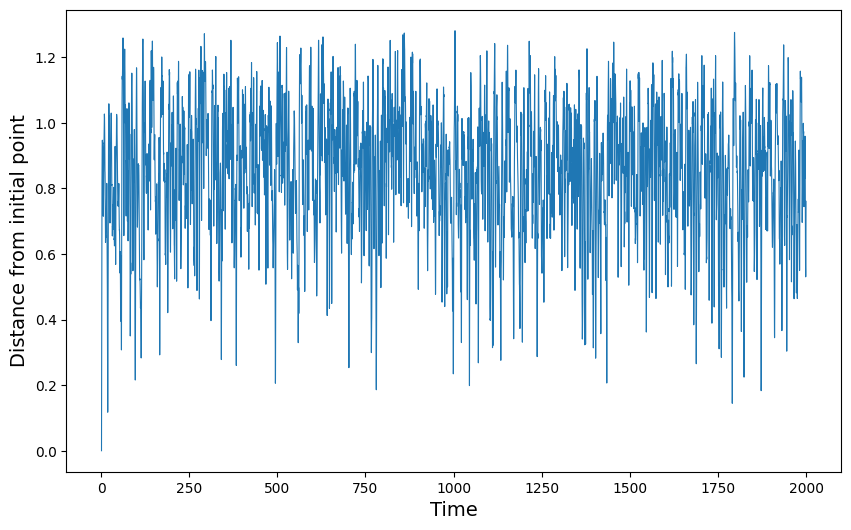

In [98]:
for i in range(len(initial_points)):
    plot_distance_from_initial_point(initial_points[i], sols[i], time, i)

In [47]:
def make_plots(sols, initial_points, time, name, plot_point = False, special_point = 0, dims_to_plot = [0,1,2]):
    
    #sols = [ odeint(DA, p, time) for p in initial_points ]

    fig = plt.figure(figsize = (8,8) )
    ax = fig.add_subplot(111, projection='3d')

    dim_x, dim_y, dim_z = dims_to_plot

    # Draw cube edges
    for s, e in [
        ((0, 0, 0), (1, 0, 0)),
        ((0, 0, 0), (0, 1, 0)),
        ((0, 0, 0), (0, 0, 1)),
        ((1, 1, 0), (1, 0, 0)),
        ((1, 1, 0), (0, 1, 0)),
        ((1, 1, 0), (1, 1, 1)),
        ((0, 1, 1), (0, 1, 0)),
        ((0, 1, 1), (0, 0, 1)),
        ((0, 1, 1), (1, 1, 1)),
        ((1, 0, 1), (1, 0, 0)),
        ((1, 0, 1), (0, 0, 1)),
        ((1, 0, 1), (1, 1, 1)),
    ]:
        ax.plot([s[0], e[0]], [s[1], e[1]], [s[2], e[2]], 'k-', lw=1)
    
    for sol in sols:
        x, y, z = sol[:, dim_x], sol[:, dim_y], sol[:, dim_z]
        ax.plot(x, y, z, color = 'blue', linewidth=0.5)

    #initial_vectors = [ DA(p, 0) for p in initial_points ]
    
    #x_quiver, y_quiver, z_quiver = utils.coords_points(initial_points)
    #dx_quiver, dy_quiver, dz_quiver = utils.coords_points(initial_vectors)
    
    #ax.quiver(x_quiver, y_quiver, z_quiver, dx_quiver, dy_quiver, dz_quiver, color='blue')
        
   
    
    ax.set_xlabel(dim_x)
    ax.set_ylabel(dim_y)
    ax.set_zlabel(dim_z, labelpad=-2)  # Increase padding for the z-label
    plt.tight_layout()

    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([0, 1])
    #ax.set_title(f"{name} - {A.reglabels[sharp_index]} - Plotting {dims_to_plot}")
    #set_axes_equal(ax)

    # scatter initial conditions
    [ax.plot(*[p[i] for i in dims_to_plot], 'ro', ms = 3) for p in initial_points ]

    if plot_point:
        ax.plot(*special_point, "ko")
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

    # Set viewpoint: close to equator
    ax.view_init(elev=18, azim=-35)
    

    #plt.tight_layout()
    #plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)


    utils.make_folder(current_directory)
    plt.savefig(f'{current_directory}/{NAME}-{dims_to_plot}.pdf', bbox_inches='tight')#, pad_inches = 0)
    plt.show()
        
    

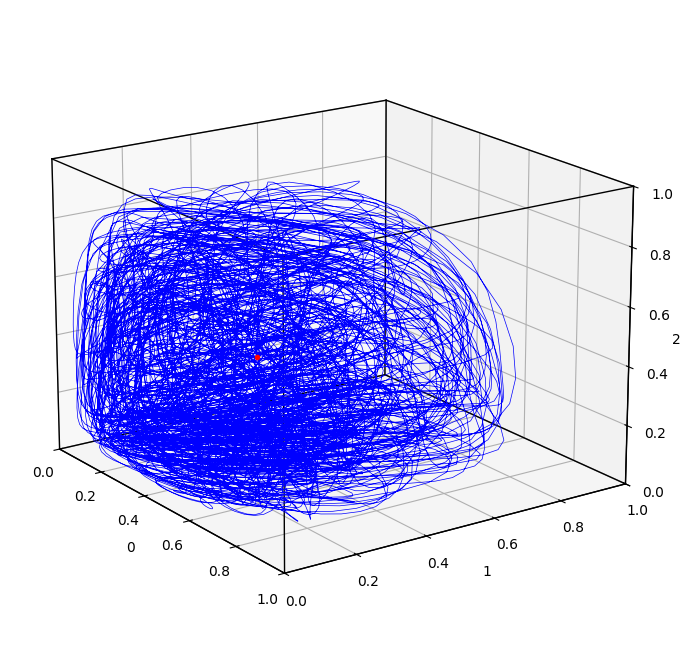

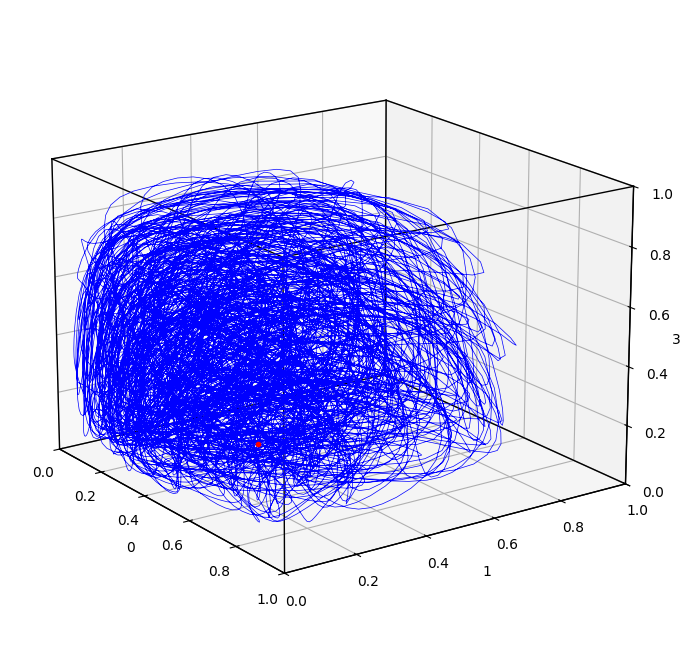

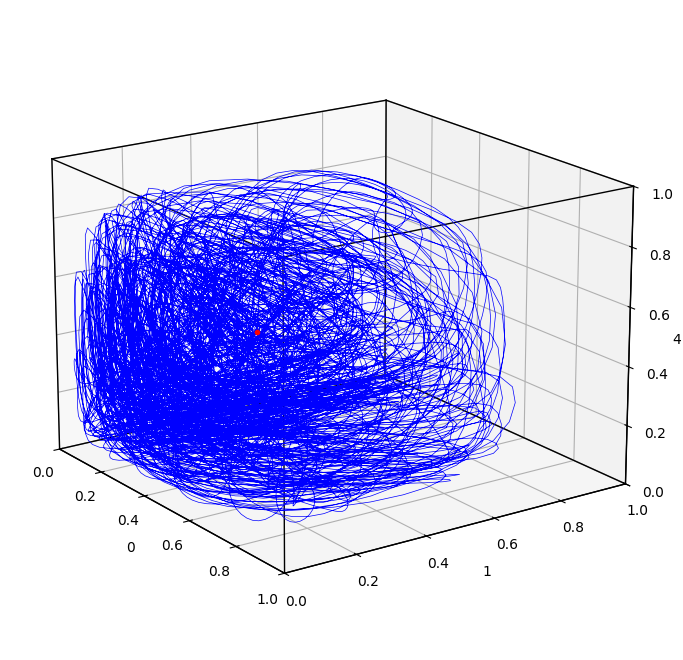

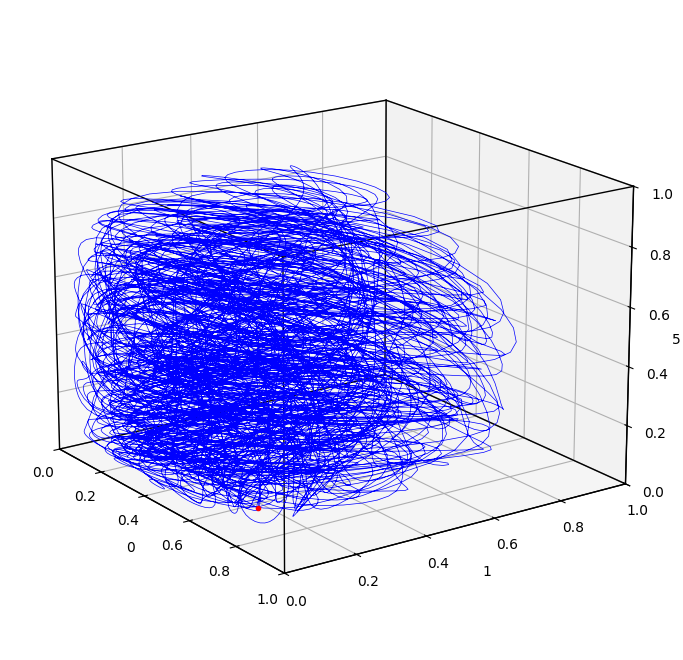

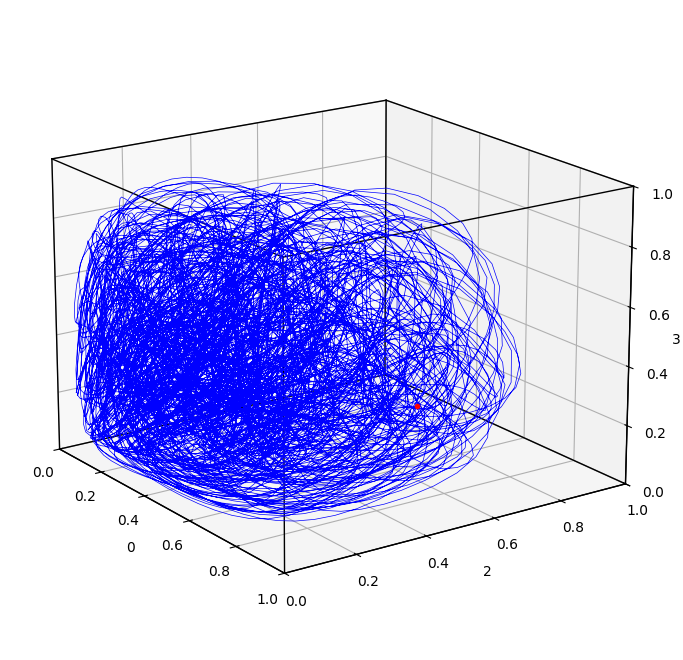

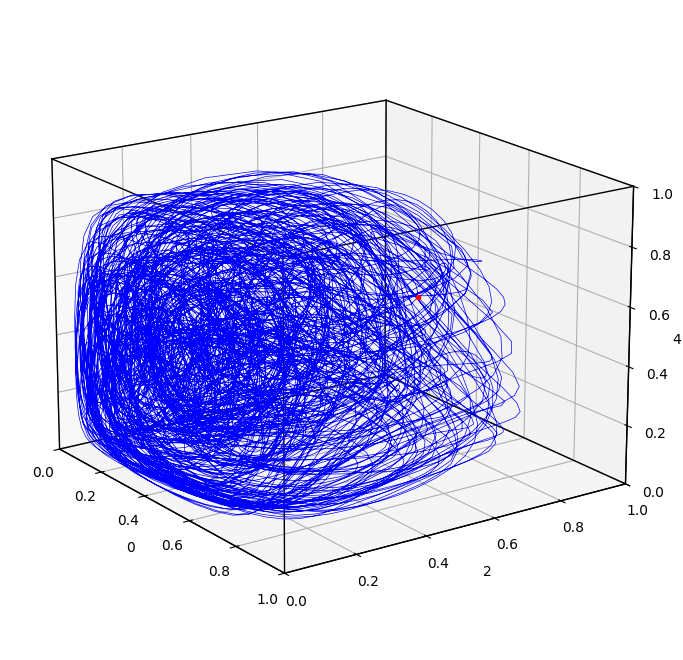

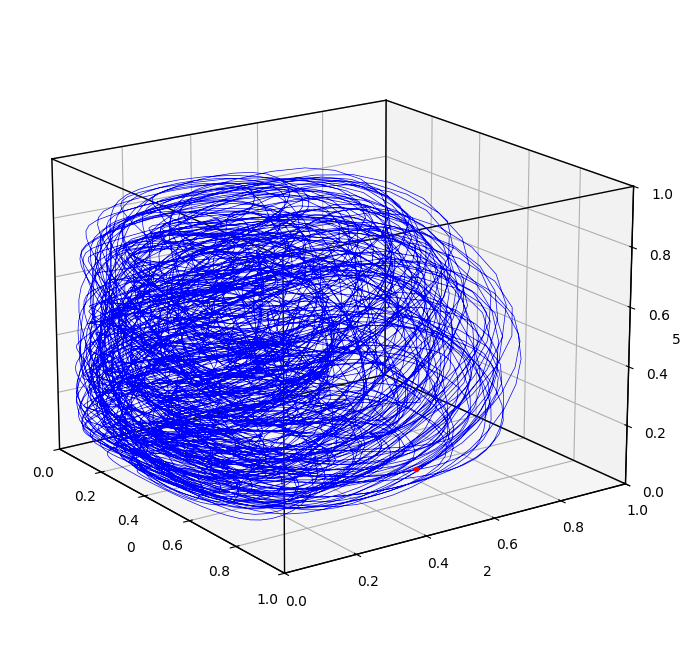

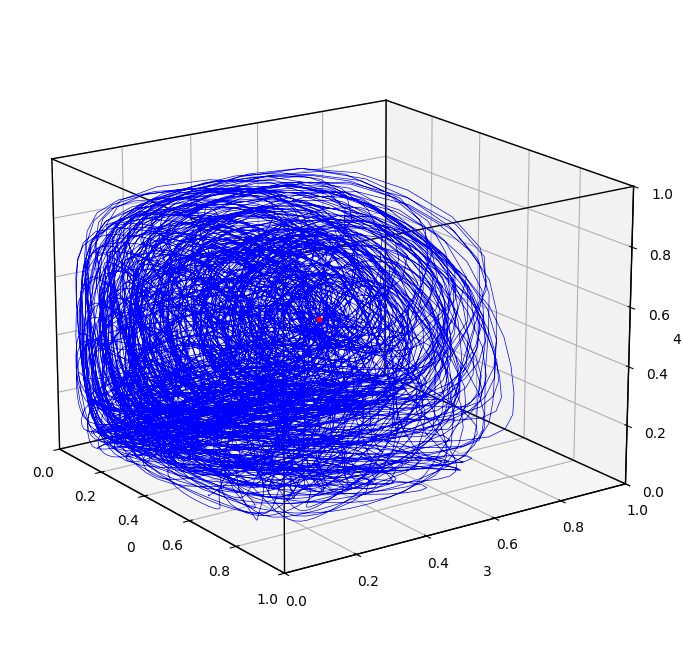

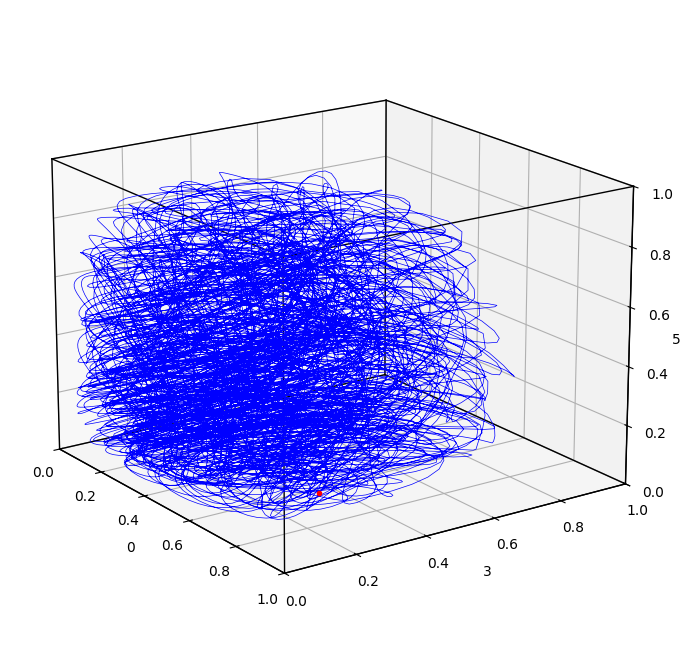

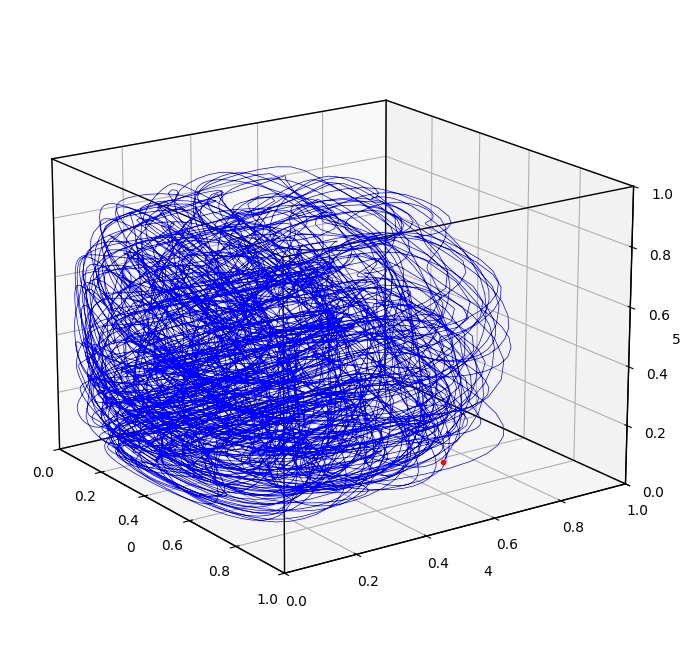

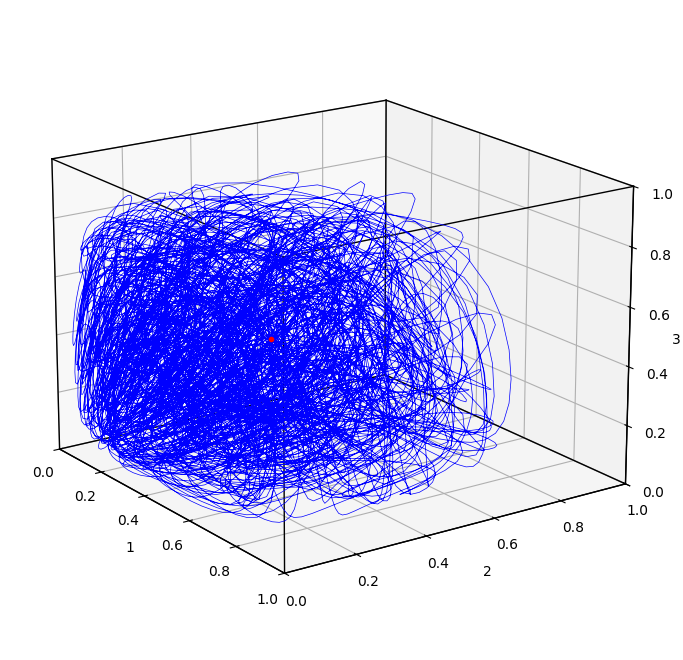

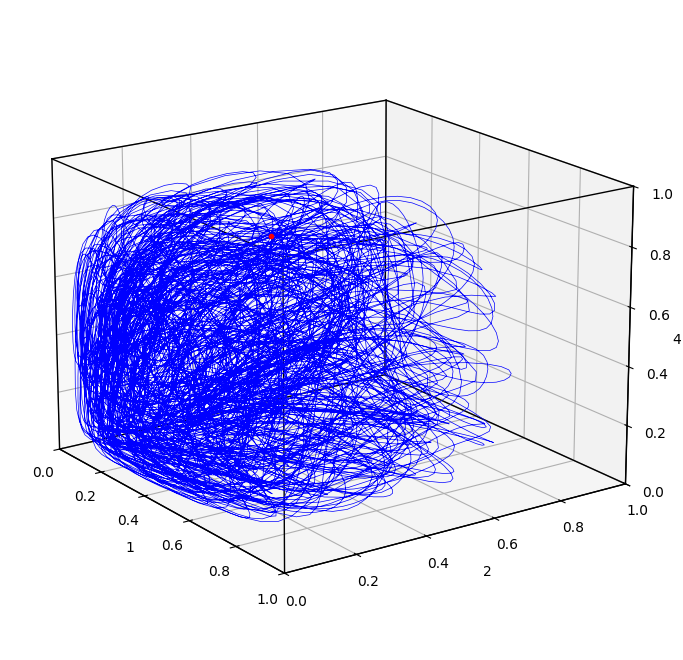

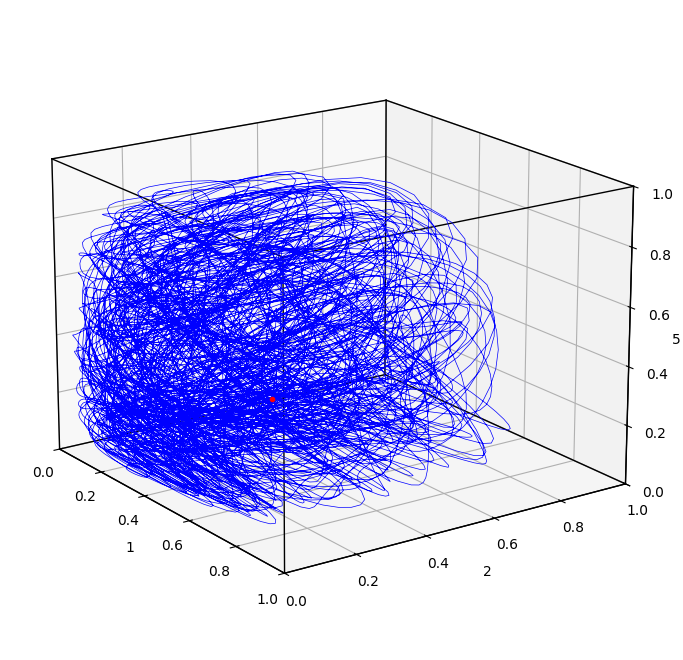

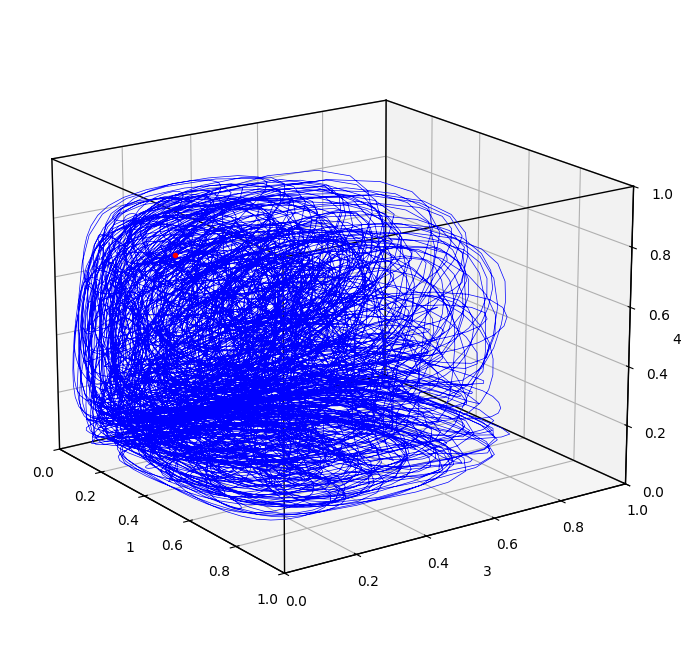

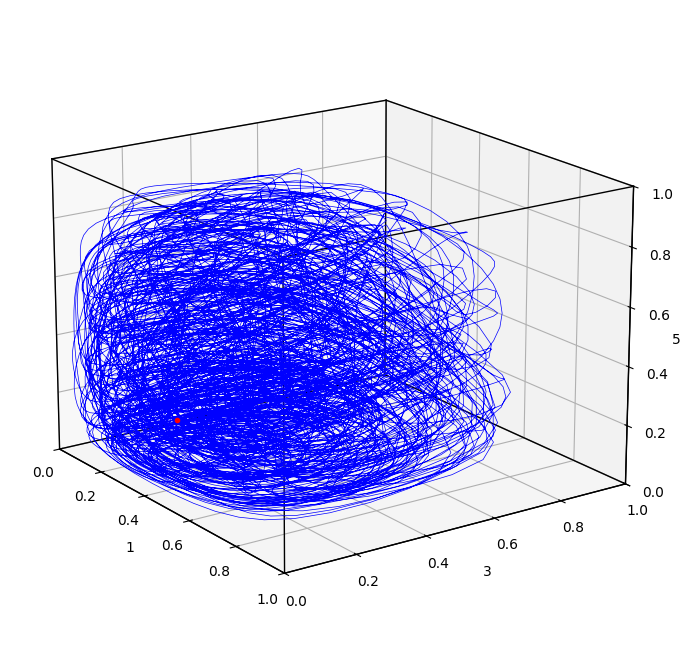

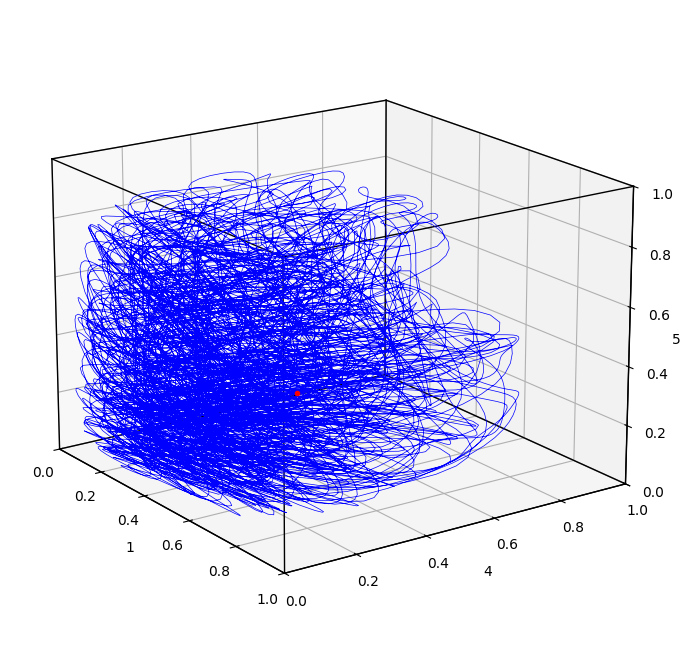

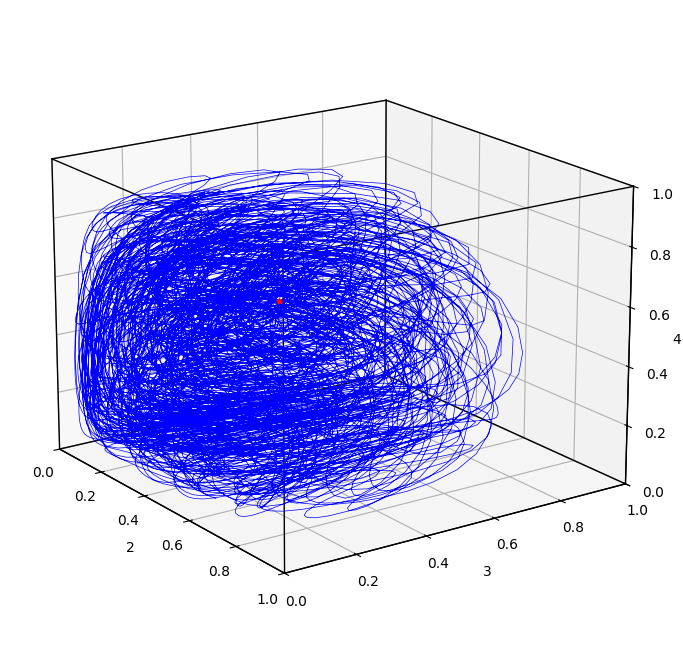

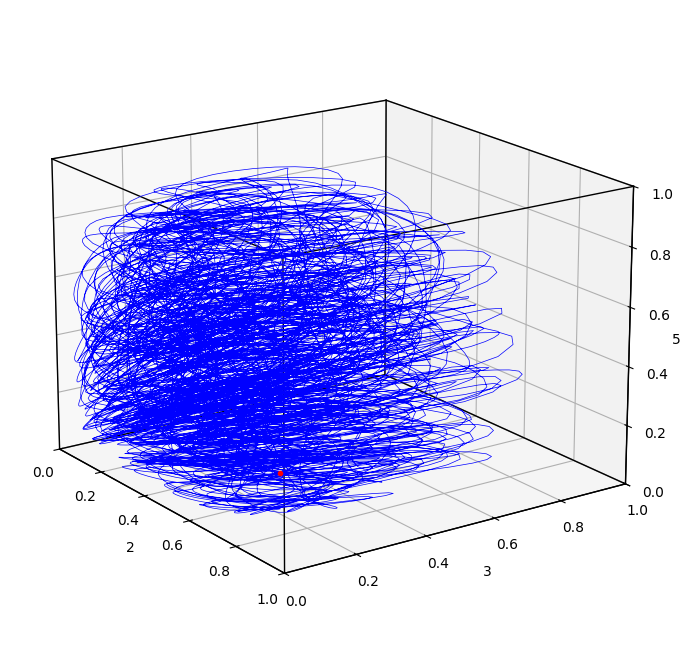

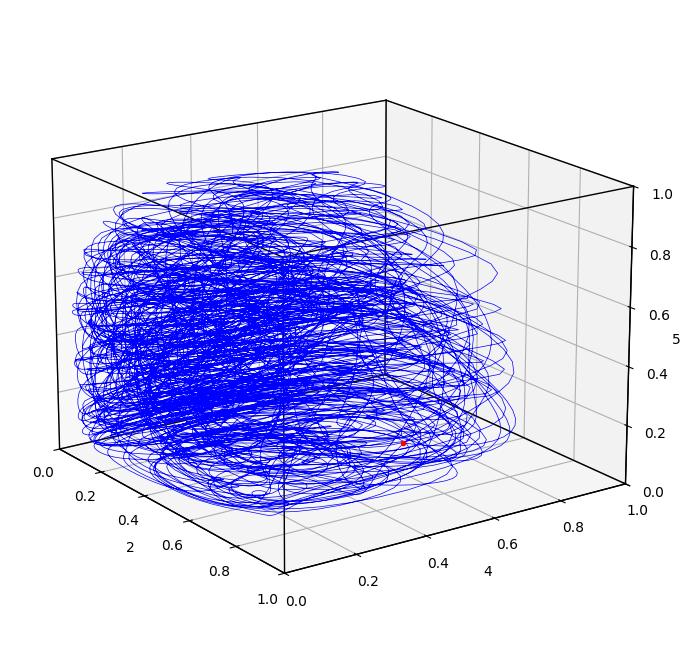

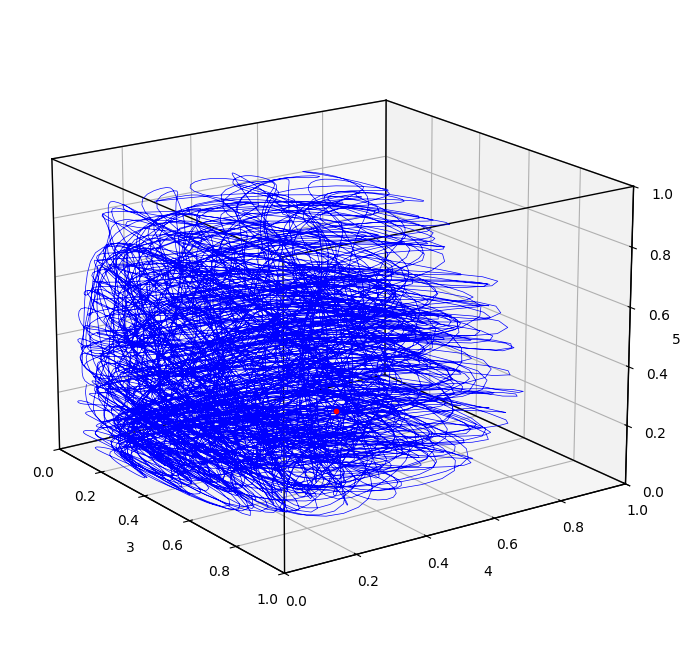

In [48]:
for triple in triples:
    make_plots(sols = sols, initial_points = initial_points, time = time, name = "Incompressible", dims_to_plot = triple)